In [1]:
import numpy as np 
from matplotlib.ticker import FuncFormatter, MultipleLocator, AutoMinorLocator
import marathon_2026_training as mt
import matplotlib.pyplot as plt  
import pandas as pd
import statsmodels.api as sm

In [2]:
pd.set_option("format.precision", 2)

In [3]:
df_løb = mt.df_løb[["dag_dato", "kategori", "km", "min/km", "pace", "HR", "tid", "kj", "split km", "split tid", "split pace"]]

In [4]:
df_løb.head(10).style.hide(axis="index")

dag_dato,kategori,km,min/km,pace,HR,tid,kj,split km,split tid,split pace
"Sunday, 08-06-2025",progression,10.01,5.26,00:05:15,154,00:52:37,3152.15,nan,nan,nan
"Saturday, 07-06-2025",hills,9.11,6.12,00:06:07,146,00:55:45,2868.74,nan,nan,nan
"Thursday, 05-06-2025",intervals,8.32,5.18,00:05:10,153,00:43:06,2619.97,nan,nan,nan
"Wednesday, 04-06-2025",strides,7.37,5.51,00:05:30,149,00:40:35,2320.81,nan,nan,nan
"Tuesday, 03-06-2025",progression,10.00,5.66,00:05:39,149,00:56:36,3149.00,nan,nan,nan
"Sunday, 01-06-2025",long,15.00,5.41,00:05:24,152,01:21:12,4723.50,nan,nan,nan
"Saturday, 31-05-2025",easy,6.00,5.70,00:05:42,144,00:34:13,1889.40,nan,nan,nan
"Friday, 30-05-2025",pace,10.00,4.98,00:04:59,166,00:49:50,3149.00,nan,nan,nan
"Wednesday, 28-05-2025",easy,2.53,5.78,00:05:47,154,00:14:38,796.70,nan,nan,nan
"Wednesday, 28-05-2025",pace,5.00,4.79,00:04:47,167,00:23:57,1574.50,nan,nan,nan


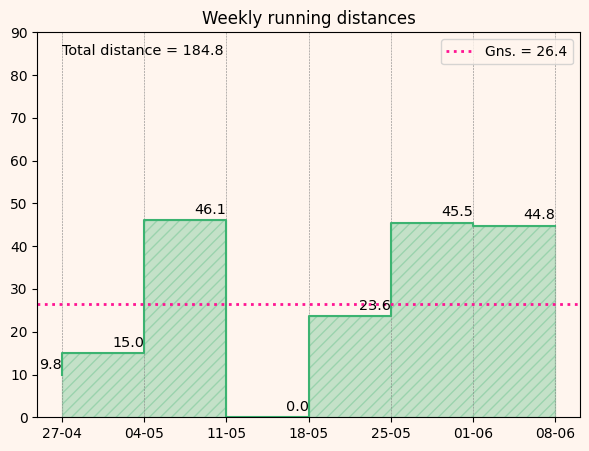

In [5]:
mt.week_block_graph(title="Weekly running distances", n_weeks=7)

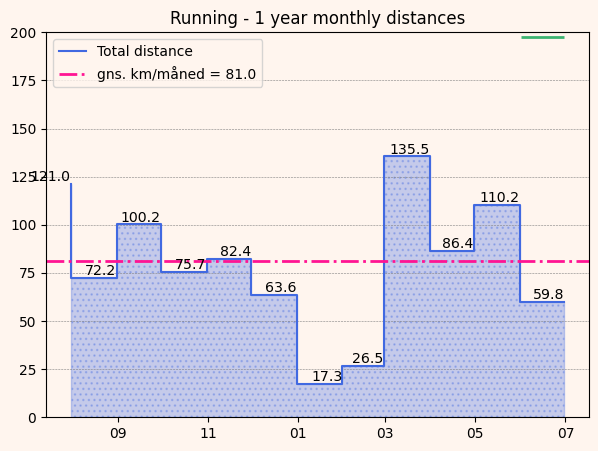

In [6]:
mt.monthly_distance_graph()

In [7]:
mt.yearly_distance(2024)
mt.yearly_distance(2025)

Kilometer i 2024:  864.3
Kilometer i 2025:  435.8


## 5k pace ranks

In [8]:
mt.show_5k(rank=True, n_rows=10)

rank,dag_dato,kategori,km,pace,tid,HR,kj
1,"Saturday, 02-11-2024",Tempo,5.00,00:04:36,00:23:04,165,1574.50
2,"Saturday, 24-05-2025",pace,5.01,00:04:40,00:23:27,162,1577.65
4,"Wednesday, 28-05-2025",pace,5.00,00:04:47,00:23:57,167,1574.50
3,"Saturday, 19-10-2024",Tempo,5.01,00:04:47,00:23:58,nan,1577.65
5,"Friday, 13-09-2024",Tempo,5.01,00:04:53,00:24:30,nan,1577.65
6,"Wednesday, 18-09-2024",Tempo,5.01,00:04:59,00:25:01,nan,1577.65
7,"Thursday, 25-07-2024",Tempo,5.00,00:05:02,00:25:11,nan,1574.50
8,"Monday, 19-08-2024",Tempo,5.01,00:05:04,00:25:26,nan,1577.65
10,"Saturday, 06-07-2024",Tempo,3.84,00:05:05,00:19:35,nan,1209.22
9,"Thursday, 24-10-2024",Tempo,4.19,00:05:05,00:21:20,nan,1319.43


## 10k pace ranks

In [9]:
mt.show_10k(rank=True, n_rows=10)

rank,dag_dato,kategori,km,pace,tid,HR,kj
1,"Friday, 30-05-2025",pace,10.00,00:04:59,00:49:50,166,3149.00
2,"Tuesday, 05-11-2024",Distance,10.01,00:05:06,00:51:05,157,3152.15
3,"Wednesday, 30-10-2024",Distance,10.00,00:05:07,00:51:15,155,3149.00
4,"Sunday, 04-05-2025",Distance,10.01,00:05:11,00:51:59,157,3152.15
5,"Sunday, 27-04-2025",Tempo,8.70,00:05:13,00:45:28,163,2739.63
6,"Sunday, 08-06-2025",progression,10.01,00:05:15,00:52:37,154,3152.15
7,"Thursday, 27-03-2025",Distance,10.01,00:05:21,00:53:40,153,3152.15
8,"Friday, 18-10-2024",Distance,9.01,00:05:26,00:49:04,nan,2837.25
9,"Sunday, 22-09-2024",Distance,10.00,00:05:27,00:54:35,nan,3149.00
10,"Monday, 20-05-2024",Distance,10.00,00:05:30,00:55:06,nan,3149.00


## 15k pace ranks

In [10]:
mt.show_15k(rank=True, n_rows=10)

rank,dag_dato,kategori,km,pace,tid,HR,kj
1,"Sunday, 01-06-2025",long,15.00,00:05:24,01:21:12,152,4723.50
2,"Friday, 15-11-2024",Distance,15.00,00:05:33,01:23:17,147,4723.50
3,"Sunday, 17-11-2024",Distance,15.01,00:05:34,01:23:36,148,4726.65
4,"Sunday, 29-12-2024",Distance,15.01,00:05:39,01:24:59,145,4726.65
5,"Friday, 11-10-2024",Distance,13.00,00:05:49,01:15:42,nan,4093.70
6,"Saturday, 05-04-2025",Distance,14.00,00:05:51,01:21:54,147,4408.60
7,"Sunday, 02-03-2025",Distance,15.00,00:05:52,01:28:05,151,4723.50
8,"Saturday, 10-08-2024",Distance,15.01,00:06:05,01:31:28,nan,4726.65
9,"Thursday, 20-03-2025",Distance,13.42,00:06:06,01:21:54,146,4225.96


## 10k development

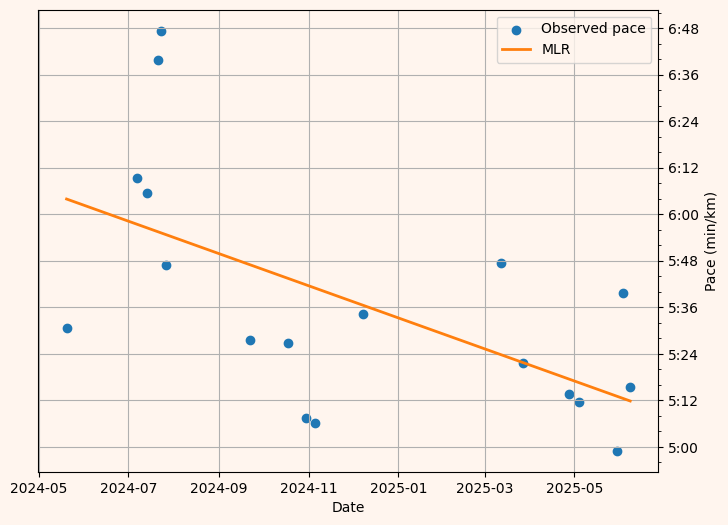

In [11]:
# Create MLR model for 10k runs. 
dates = mt.df_10k["dato"]
# Time t = 0, 1, 2,... n days. 
t = (mt.df_10k["dato"] - mt.df_10k["dato"].min()).dt.days.astype(float) 
# Pace converted to floats. 
y = mt.df_10k["min/km"]
X = sm.add_constant(t)
MLR_10k = sm.OLS(y, X).fit()
y_fit = MLR_10k.fittedvalues
# print(MLR_10k.summary())

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(dates, y, label="Observed pace")
ax.plot(dates, y_fit, color="C1", lw=2, label="MLR")

# Format y-axis as min/km. 
def pace_formatter(x, pos):
    m = int(x)
    s = int(round((x - m) * 60))
    if s == 60:
        m += 1
        s = 0
    return f"{m}:{s:02d}"

ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.yaxis.set_major_formatter(FuncFormatter(pace_formatter))
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.grid(True)
plt.xlabel("Date")
plt.ylabel("Pace (min/km)")
plt.legend()
plt.show()


In [12]:
# hastighedsforbedring: sek/km/dag
MLR_10k.params[1]*60

-0.1356428781997966

In [26]:
mt.print_heart_zones(age=34, RHR=55)

Theoretical MHR: 186 bpm
Resting HR (RHR): 55 bpm

Zone 1 (Recovery: very easy, promotes blood flow and clearing):
  % of Max 0–60%: 0–112 bpm
  Karvonen 0–60% HRR: 55–134 bpm

Zone 2 (Endurance: easy-steady, builds aerobic base):
  % of Max 60–70%: 112–130 bpm
  Karvonen 60–70% HRR: 134–147 bpm

Zone 3 (Tempo: comfortably hard, sustainable 45-90 min):
  % of Max 70–80%: 130–149 bpm
  Karvonen 70–80% HRR: 147–160 bpm

Zone 4 (Threshold: hard, sustainable 20-30 min):
  % of Max 80–90%: 149–167 bpm
  Karvonen 80–90% HRR: 160–173 bpm

Zone 5 (VO₂ Max: near all-out, sustainable 3-8 min intervals):
  % of Max 90–100%: 167–186 bpm
  Karvonen 90–100% HRR: 173–186 bpm



## 2025 Marathon block

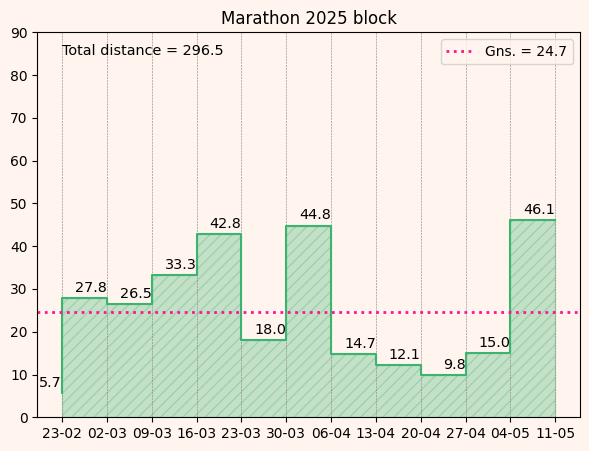

In [14]:
mt.week_block_graph(title="Marathon 2025 block", df=mt.mara25_block, n_weeks=12)